# Konstellasjon

Antall samples: 48000
Antall symboler: 288
Total tid: 0.075 sekunder


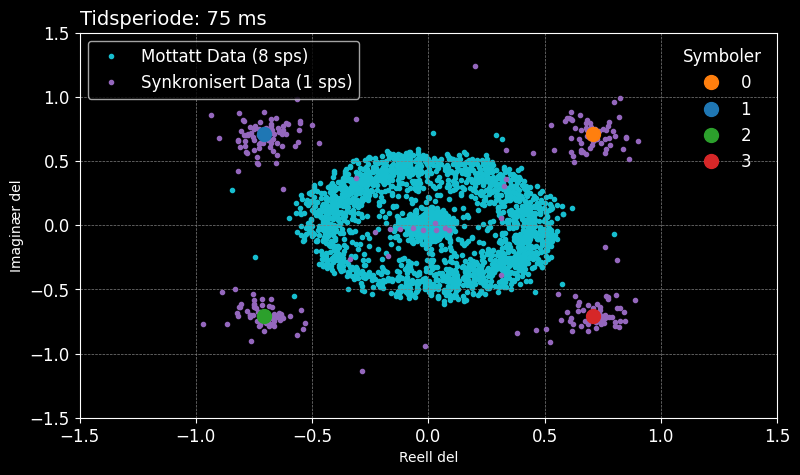

In [117]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Last inn kompleks data og plott eye diagram og konstellasjon
file_path = 'SimData/RxSynced.bin'
data = np.fromfile(file_path, dtype=np.complex64)

file_path2 ='SimData/Rx_tidsserie.bin'
data2 = np.fromfile(file_path2, dtype=np.complex64)

samp_rate = 640e3
tid_per_pakke = 25e-3  # 25 ms

N_pakker = 3
symboler_per_pakke = 80  # 80 symboler per pakke

N0 =int(N_pakker *tid_per_pakke * samp_rate)
N = int(N_pakker * symboler_per_pakke*1.2)

print(f'Antall samples: {N0}')
print(f'Antall symboler: {N}')


total_tid= N0 / samp_rate
print(f'Total tid: {total_tid:.3f} sekunder')

c_p = np.sqrt(2)/2 * np.array([
    1 + 1j,
    -1 + 1j,
    -1 - 1j,
    1 - 1j
])
c_p_symbols = [0,1,2,3]
c_p_colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red']

plt.figure(figsize=(9, 5))  # axs[0] = konstellasjonsdiagram, axs[1] = 3d probability density plot

# Plot synkronisert data
dataRx_plot, = plt.plot(np.real(data2[:N0]), np.imag(data2[:N0]), 'o', markersize=3, color='tab:cyan', label='Mottatt data',zorder=1)
dataSync_plot, = plt.plot(np.real(data[:N]), np.imag(data[:N]), 'o', markersize=3, color='tab:purple', label='Synkronisert data',zorder=2)
# Plot konstellasjonspunktene
symbol_plots = []
for i in range(len(c_p)):
    symbol_plot, = plt.plot(np.real(c_p[i]), np.imag(c_p[i]), 'o', markersize=10, color=c_p_colors[i],zorder=3)
    symbol_plots.append(symbol_plot)
    #plt.text(np.real(c_p[i]), np.imag(c_p[i]), str(c_p_symbols[i]), fontsize=10, color="white", ha='center', va='center')


plt.annotate(f'Tidsperiode: {total_tid*1e3:.0f} ms',xy=(0, 1.01), xycoords='axes fraction', fontsize=14, ha='left', va='bottom')

# Akseinnstillinger
plt.xlabel('Reell del')
plt.ylabel('Imaginær del')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(-1.5, 1.51, 0.5), fontsize=12)
plt.yticks(np.arange(-1.5, 1.51, 0.5), fontsize=12)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Lag separate legends
legend1 = plt.legend([dataRx_plot,dataSync_plot], ['Mottatt Data (8 sps)', 'Synkronisert Data (1 sps)'], loc='upper left', fontsize=12)  # Første legend for data
plt.gca().add_artist(legend1)  # Legg til første legend manuelt

legend2 = plt.legend(symbol_plots, [f'{c_p_symbols[i]}' for i in range(len(c_p))], loc='upper right', fontsize=12,frameon=False,title="Symboler", title_fontsize=12)  # Andre legend for symboler

# Lagre og vise figur
#plt.savefig('Figurer/Rx_konst.pdf', bbox_inches='tight')
plt.show()



# Eye-diagram

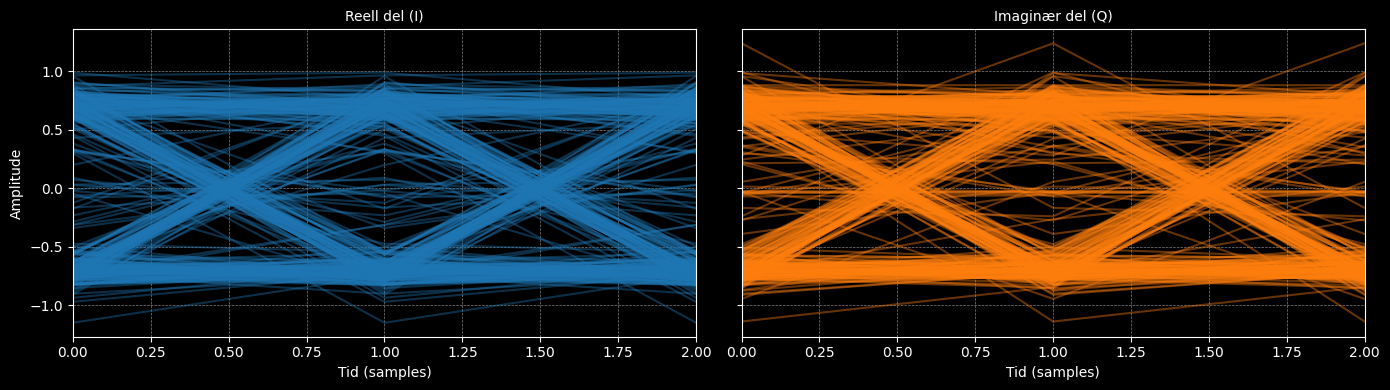

In [118]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Last inn kompleks data og plott eye diagram og konstellasjon
file_path = 'SimData/RxSynced.bin'
data = np.fromfile(file_path, dtype=np.complex64)

samp_rate = 640e3
samples_per_symbol = 1
eye_periods = 3
N = 400
def plot_eye_diagram(signal, samples_per_symbol, eye_periods=2, num_traces=200):
    """
    Plotter eye-diagram fra et kompleks signal i to subplots:
    én for realdelen og én for imaginærdelen.
    """
    real_signal = np.real(signal)
    imag_signal = np.imag(signal)
    eye_length = samples_per_symbol * eye_periods
    max_offset = len(signal) - eye_length

    fig, axs = plt.subplots(1, 2, figsize=(14, 4),sharey=True)
    for i in range(min(num_traces, max_offset // samples_per_symbol)):
        start = i * samples_per_symbol
        r_segment = real_signal[start:start + eye_length]
        j_segment = imag_signal[start:start + eye_length]

        if len(r_segment) == eye_length:
            axs[0].plot(r_segment, color='tab:blue', alpha=0.4)
            axs[1].plot(j_segment, color='tab:orange', alpha=0.4)

    axs[0].set_title("Reell del (I)", fontsize=10)
    axs[1].set_title("Imaginær del (Q)", fontsize=10)
    axs[0].set_xlabel("Tid (samples)")
    axs[1].set_xlabel("Tid (samples)")
    axs[0].set_ylabel("Amplitude")

    for ax in axs:
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.set_xlim(0, eye_length-1)

    plt.tight_layout()
    plt.savefig('Figurer/Rx_eye.pdf', bbox_inches='tight')
    plt.show()

# Plot eye-diagram for real og imaginær del
plot_eye_diagram(data, samples_per_symbol, eye_periods=eye_periods, num_traces=N)

# Eye diagram

## Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('dark_background')


# Last inn data
file_path= 'SimData/RxSyncedUpSamp.bin' # Bytt ut etter behov
data = np.fromfile(file_path, dtype=np.complex64)
data = data[len(data)//(3):]  # Ta bare den andre halvdelen av dataene
# Parametre
Fs = 640e3  # Samplingsfrekvens [Hz]
sps = 8
eye_periods = 3  # Antall symbolperioder per vindu
symbol_rate = 80e3

def EyeDiagram(signal, sps=8, eye_periods=2, Fs=1.0, symbol_rate=80e3, max_symbols = 512):
    
    samples_per_window = eye_periods * sps
    start_ind = 2 * sps  # Hopp over starttransienter
    segments = []
    T = 1/symbol_rate  # Symbolperiode [s]

    max_k = int((len(signal) - start_ind - samples_per_window) / sps)
    for k in range(min(max_k, max_symbols)):
        idx = start_ind + k * sps
        segment = signal[idx:idx + samples_per_window]
        if len(segment) == samples_per_window:
            segments.append(segment)

    segments = np.array(segments).T
    t_part = np.linspace(-eye_periods/2 * T, eye_periods/2 * T, samples_per_window)
    return t_part * 1e6, segments  # Tid i mikrosekunder

t_I, parts_I = EyeDiagram(np.real(data), sps, eye_periods, Fs)
t_Q, parts_Q = EyeDiagram(np.imag(data), sps, eye_periods, Fs)


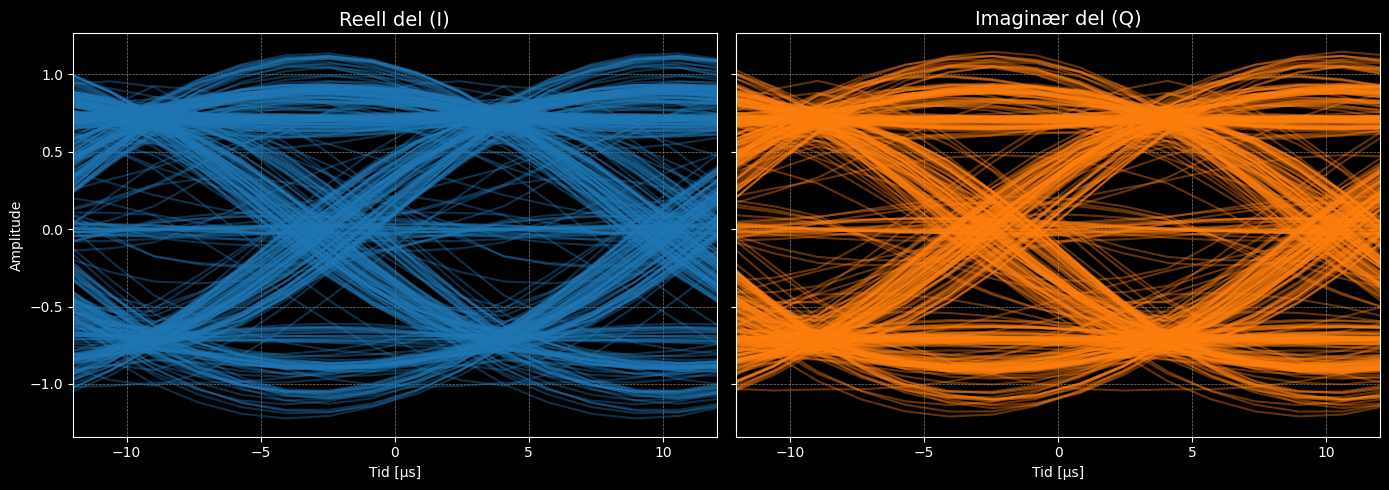

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].plot(t_I, parts_I, color='tab:blue', alpha=0.4)
axs[0].set_title('Reell del (I)', fontsize=14)
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Tid [μs]')

axs[1].plot(t_Q, parts_Q, color='tab:orange', alpha=0.4)
axs[1].set_title('Imaginær del (Q)', fontsize=14)
axs[1].set_xlabel('Tid [μs]')

for ax in axs:
    ax.grid(True, color = "gray", linewidth=0.5, linestyle='--')
    ax.set_xlim(-eye_periods/2 * Fs/symbol_rate, eye_periods/2 * Fs/symbol_rate)

plt.tight_layout()
plt.savefig('Figurer/Rx_UpSamp_eye.pdf', bbox_inches='tight')
plt.show()